In [43]:
import torch.nn as nn
import torch
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"

In [44]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=1000)

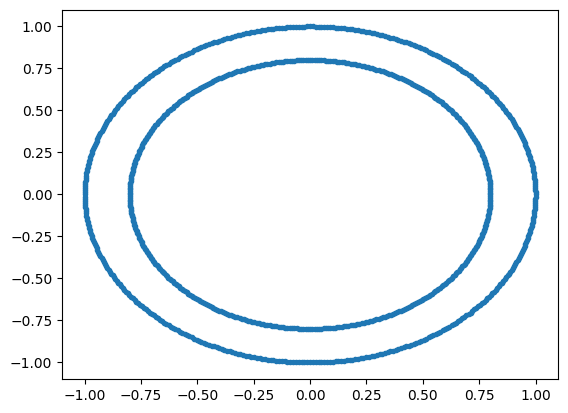

In [45]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],marker='.')

In [46]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
x_test = x_test.to(device)
x_train = x_train.to(device)
y_test = y_test.to(device)
y_train = y_train.to(device)


# Building the model
- As the first attempt, we build a model with one linear layer with 5 nodes.
- On the second layer we apply a sigmoid function.
- The Binary Cross Entropy is used for the loss function.
- The optimizer is the SGD

In [47]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    # nn.Linear(in_features=5,out_features=5),
    nn.Linear(in_features=5,out_features=1)
    ).to(device)


print(model_0.state_dict())

OrderedDict([('0.weight', tensor([[ 0.5845,  0.2712],
        [-0.5093, -0.2729],
        [ 0.3449, -0.2504],
        [-0.1966,  0.2507],
        [ 0.1379, -0.5481]], device='cuda:0')), ('0.bias', tensor([ 0.5809, -0.4007, -0.7047, -0.2898,  0.1732], device='cuda:0')), ('1.weight', tensor([[ 0.2696,  0.2302, -0.0571,  0.1637, -0.0953]], device='cuda:0')), ('1.bias', tensor([0.2449], device='cuda:0'))])


In [52]:
with torch.inference_mode():
    y_pred = torch.sigmoid(model_0(x_test))

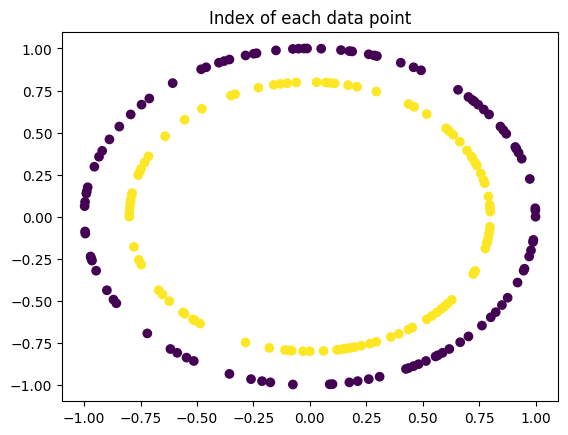

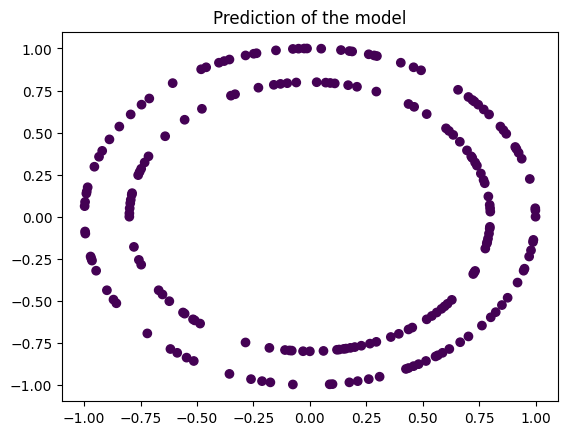

In [54]:
plt.title('Index of each data point')
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=y_test.to('cpu'))
plt.show()
plt.title('Prediction of the model')
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=torch.round(torch.sigmoid(y_pred)).to('cpu'))
plt.show()

In [55]:
loss_func = nn.BCEWithLogitsLoss()

optim = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [56]:
def accuracy(y_pred,y_test):
    ratio_acc = torch.eq(torch.round(torch.sigmoid(y_pred)),y_test).sum().item()
    return np.round(100*ratio_acc/y_test.size()[0],1)

In [57]:
y_pred_logits = []
loss_pred = []
acc_pred = []

In [58]:

for epochs  in range(1000):
    model_0.train()

    y_logits = model_0(x_train).squeeze()

    loss = loss_func(y_logits,y_train)

    acc = accuracy(y_logits,y_train)

    optim.zero_grad()

    loss.backward()

    optim.step()

    model_0.eval()

    with torch.inference_mode():
        y_pred_logits.append(model_0(x_test).squeeze())
        loss_pred.append(loss_func(y_pred_logits[-1],y_test))
        acc_pred.append(accuracy(y_pred_logits[-1],y_test))

    if epochs%10==0:
        print(f'epoch: {epochs} ||| acc: {acc_pred[-1]}% ||| loss: {loss_pred[-1]}')

epoch: 0 ||| acc: 48.5% ||| loss: 0.711049497127533
epoch: 10 ||| acc: 48.5% ||| loss: 0.7097395062446594
epoch: 20 ||| acc: 48.5% ||| loss: 0.7085535526275635
epoch: 30 ||| acc: 48.5% ||| loss: 0.7074791789054871
epoch: 40 ||| acc: 48.5% ||| loss: 0.7065052390098572
epoch: 50 ||| acc: 48.5% ||| loss: 0.7056219577789307
epoch: 60 ||| acc: 48.5% ||| loss: 0.7048201560974121
epoch: 70 ||| acc: 48.5% ||| loss: 0.7040918469429016
epoch: 80 ||| acc: 48.5% ||| loss: 0.7034299373626709
epoch: 90 ||| acc: 48.5% ||| loss: 0.7028278112411499
epoch: 100 ||| acc: 48.5% ||| loss: 0.7022796273231506
epoch: 110 ||| acc: 48.5% ||| loss: 0.7017802000045776
epoch: 120 ||| acc: 48.5% ||| loss: 0.701324999332428
epoch: 130 ||| acc: 48.5% ||| loss: 0.7009094953536987
epoch: 140 ||| acc: 48.5% ||| loss: 0.7005299925804138
epoch: 150 ||| acc: 48.5% ||| loss: 0.700183093547821
epoch: 160 ||| acc: 48.5% ||| loss: 0.6998656988143921
epoch: 170 ||| acc: 48.5% ||| loss: 0.6995750069618225
epoch: 180 ||| acc: 48.5

**We see that the model does not predict well.**

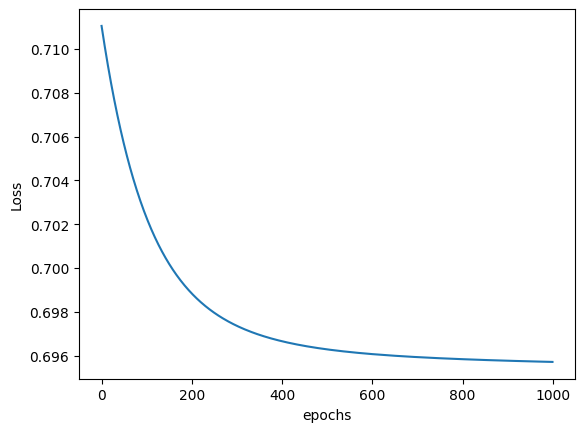

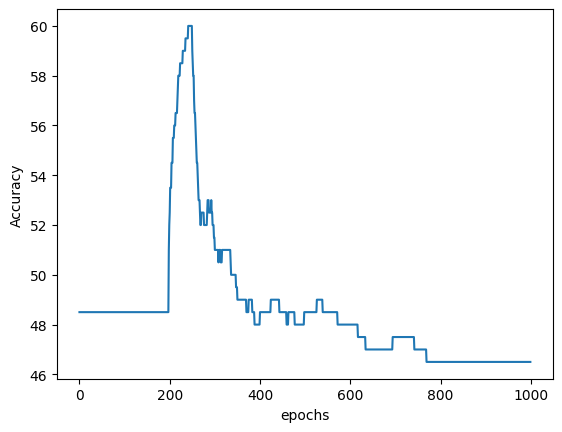

In [59]:
plt.plot([i.to('cpu') for i in loss_pred])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(acc_pred)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

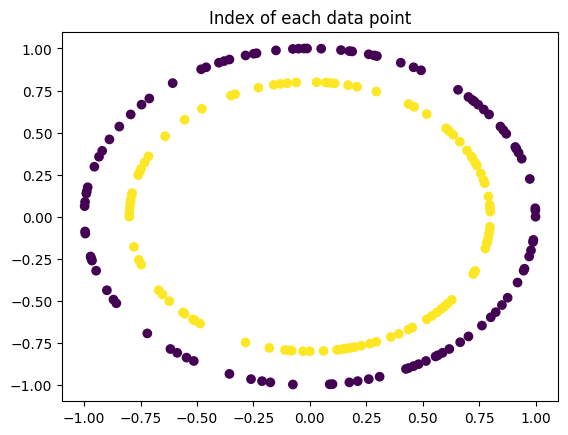

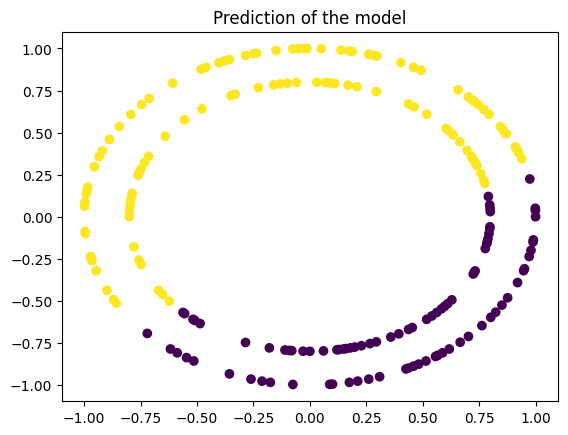

In [60]:
plt.title('Index of each data point')
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=y_test.to('cpu'))
plt.show()
plt.title('Prediction of the model')
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=torch.round(torch.sigmoid(y_pred_logits[-1])).to('cpu').to('cpu'))
plt.show()

# See if larger linear network changes anything

In [61]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2,out_features=10,bias=True),
    nn.Linear(in_features=10,out_features=10,bias=True),
    nn.Linear(in_features=10,out_features=1,bias=True)
    ).to(device)


# print(model_1.state_dict())

In [62]:
loss_func = nn.BCEWithLogitsLoss()

optim = torch.optim.SGD(params=model_1.parameters(),lr=0.001)

In [63]:
y_pred_logits = []
loss_pred = []
acc_pred = []

In [64]:
for epochs  in range(5000):
    model_1.train()

    y_logits = model_1(x_train).squeeze()

    loss = loss_func(y_logits,y_train)

    acc = accuracy(y_logits,y_train)

    optim.zero_grad()

    loss.backward()

    optim.step()

    model_0.eval()

    with torch.inference_mode():
        y_pred_logits.append(model_1(x_test).squeeze())
        loss_pred.append(loss_func(y_pred_logits[-1],y_test))
        acc_pred.append(accuracy(y_pred_logits[-1],y_test))

    if epochs%100==0:
        print(f'epoch: {epochs} ||| acc: {acc_pred[-1]}% ||| loss: {loss_pred[-1]}')

epoch: 0 ||| acc: 48.5% ||| loss: 0.7095675468444824
epoch: 100 ||| acc: 48.5% ||| loss: 0.7078978419303894
epoch: 200 ||| acc: 48.5% ||| loss: 0.7064098119735718
epoch: 300 ||| acc: 48.5% ||| loss: 0.7050827145576477
epoch: 400 ||| acc: 48.5% ||| loss: 0.7038980722427368
epoch: 500 ||| acc: 48.5% ||| loss: 0.7028400897979736
epoch: 600 ||| acc: 48.5% ||| loss: 0.7018947601318359
epoch: 700 ||| acc: 48.5% ||| loss: 0.7010493278503418
epoch: 800 ||| acc: 48.5% ||| loss: 0.7002930045127869
epoch: 900 ||| acc: 48.5% ||| loss: 0.699616014957428
epoch: 1000 ||| acc: 48.5% ||| loss: 0.6990095376968384
epoch: 1100 ||| acc: 48.5% ||| loss: 0.6984661817550659
epoch: 1200 ||| acc: 48.5% ||| loss: 0.6979788541793823
epoch: 1300 ||| acc: 48.5% ||| loss: 0.6975417137145996
epoch: 1400 ||| acc: 48.5% ||| loss: 0.6971493363380432
epoch: 1500 ||| acc: 48.5% ||| loss: 0.6967968344688416
epoch: 1600 ||| acc: 48.5% ||| loss: 0.6964801549911499
epoch: 1700 ||| acc: 48.5% ||| loss: 0.6961953639984131
epoch

**It seems it got worse**

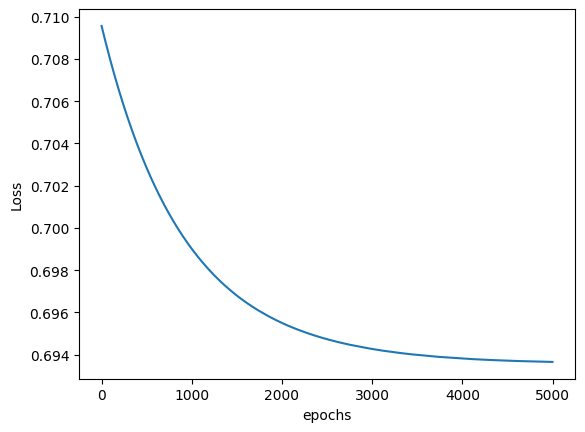

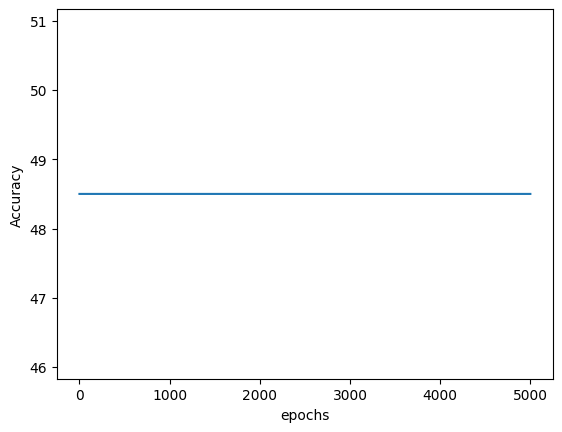

In [65]:
plt.plot([i.to('cpu') for i in loss_pred])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(acc_pred)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

# Adding non-Linearity
Of course we expect a non-linear data cannot be describe with a linear model. So we try to add non-linearity on the layers.
The first method that we test is the ReLU

In [79]:
model_3 = nn.Sequential(
    nn.Linear(2,5),
    nn.ReLU(),
    nn.Linear(5,1)
    ).to(device)


print(model_3.state_dict())

OrderedDict([('0.weight', tensor([[ 0.5902,  0.2062],
        [ 0.2005, -0.0535],
        [ 0.6795,  0.4376],
        [-0.3405,  0.3434],
        [ 0.3881, -0.3982]], device='cuda:0')), ('0.bias', tensor([-0.1086,  0.7012, -0.6055, -0.2645,  0.4050], device='cuda:0')), ('2.weight', tensor([[ 0.3861, -0.1675,  0.0706,  0.1166, -0.2201]], device='cuda:0')), ('2.bias', tensor([-0.2933], device='cuda:0'))])


In [80]:
with torch.inference_mode():
    y_pred = torch.sigmoid(model_3(x_test))

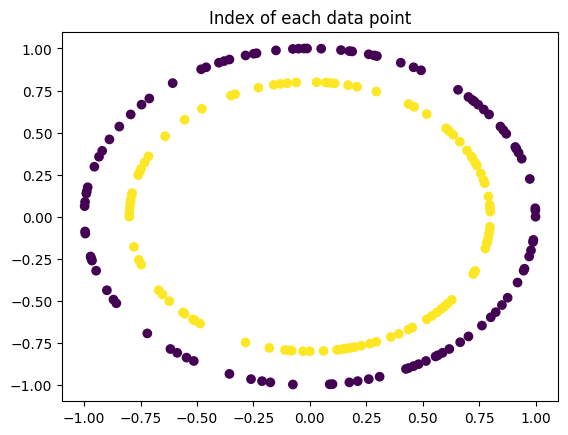

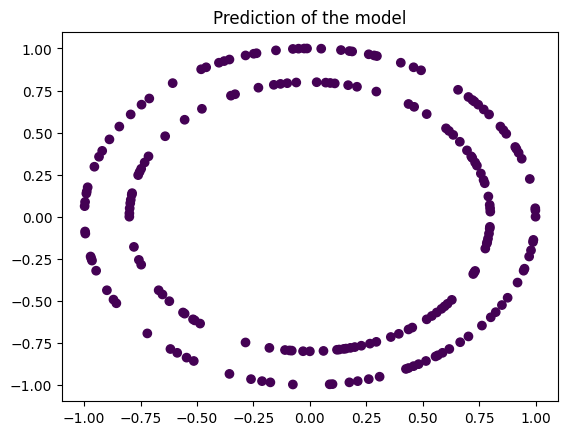

In [81]:
plt.title('Index of each data point')
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=y_test.to('cpu'))
plt.show()
plt.title('Prediction of the model')
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=torch.sigmoid(y_pred).round().to('cpu').to('cpu'))
plt.show()

In [82]:
loss_func = nn.BCEWithLogitsLoss()

optim = torch.optim.SGD(params=model_3.parameters(),lr=0.01)

In [83]:
y_pred_logits = []
loss_pred = []
acc_pred = []

In [84]:

for epochs  in range(5001):
    model_0.train()

    y_logits = model_3(x_train).squeeze()

    loss = loss_func(y_logits,y_train)

    acc = accuracy(y_logits,y_train)

    optim.zero_grad()

    loss.backward()

    optim.step()

    model_3.eval()

    with torch.inference_mode():
        y_pred_logits.append(model_3(x_test).squeeze())
        loss_pred.append(loss_func(y_pred_logits[-1],y_test))
        acc_pred.append(accuracy(y_pred_logits[-1],y_test))

    if epochs%1000==0:
        print(f'epoch: {epochs} ||| acc: {acc_pred[-1]}% ||| loss: {loss_pred[-1]}')

epoch: 0 ||| acc: 51.5% ||| loss: 0.7194911241531372
epoch: 1000 ||| acc: 45.5% ||| loss: 0.6973665356636047
epoch: 2000 ||| acc: 47.0% ||| loss: 0.6956943869590759
epoch: 3000 ||| acc: 48.5% ||| loss: 0.6939679384231567
epoch: 4000 ||| acc: 48.5% ||| loss: 0.6917670965194702
epoch: 5000 ||| acc: 48.5% ||| loss: 0.6887415647506714


**It gets better but still not good enough.**

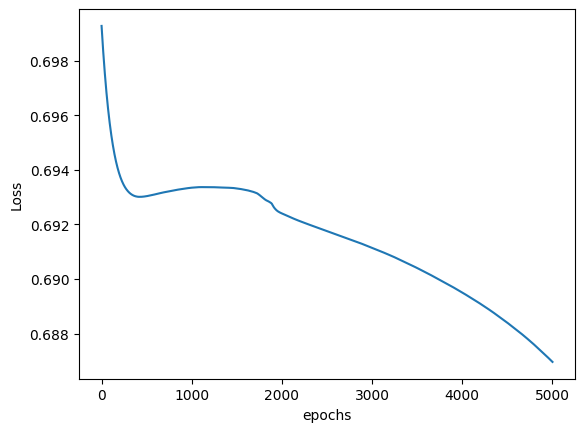

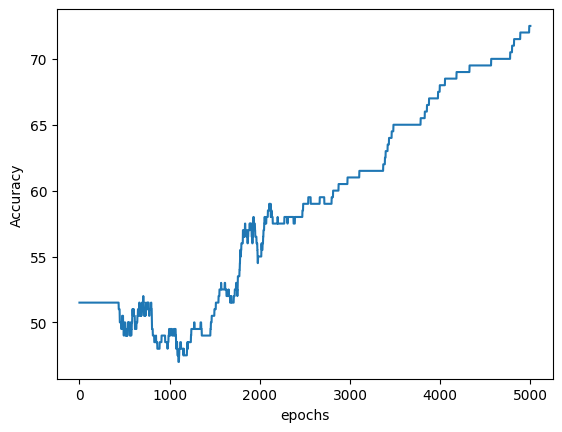

In [94]:
plt.plot([i.to('cpu') for i in loss_pred])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(acc_pred)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

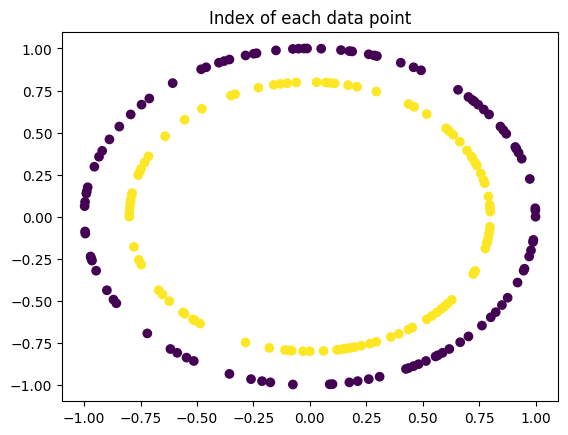

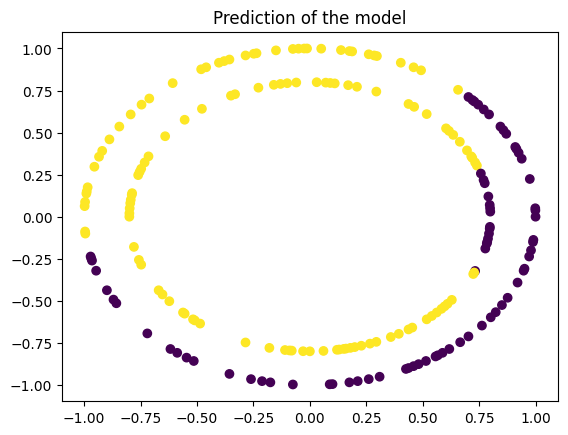

In [95]:
plt.title('Index of each data point')
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=y_test.to('cpu'))
plt.show()
plt.title('Prediction of the model')
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=torch.round(torch.sigmoid(y_pred_logits[-1])).to('cpu').to('cpu'))
plt.show()

In [96]:
model_4 = nn.Sequential(
    nn.Linear(2,5),
    nn.ReLU(),
    nn.Linear(5,5),
    nn.ReLU(),
    nn.Linear(5,1)
    ).to(device)


# print(model_4.state_dict())

In [97]:
with torch.inference_mode():
    y_pred = torch.sigmoid(model_4(x_test))

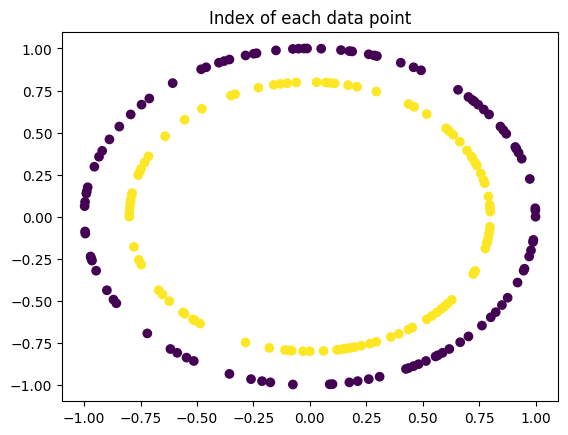

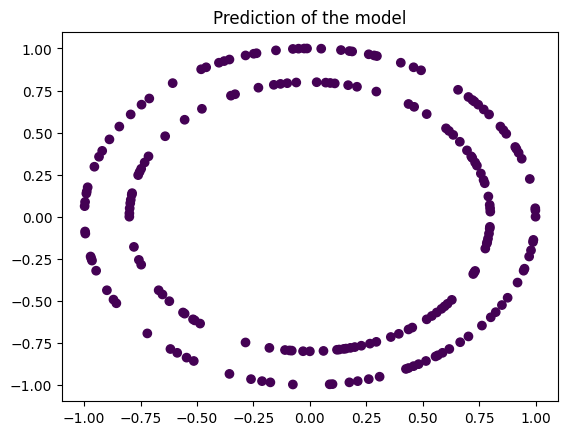

In [98]:
plt.title('Index of each data point')
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=y_test.to('cpu'))
plt.show()
plt.title('Prediction of the model')
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=torch.sigmoid(y_pred).round().to('cpu').to('cpu'))
plt.show()

In [99]:
loss_func = nn.BCEWithLogitsLoss()

optim = torch.optim.SGD(params=model_4.parameters(),lr=0.01)

In [100]:
y_pred_logits = []
loss_pred = []
acc_pred = []

In [101]:

for epochs  in range(10001):
    model_0.train()

    y_logits = model_4(x_train).squeeze()

    loss = loss_func(y_logits,y_train)

    acc = accuracy(y_logits,y_train)

    optim.zero_grad()

    loss.backward()

    optim.step()

    model_3.eval()

    with torch.inference_mode():
        y_pred_logits.append(model_4(x_test).squeeze())
        loss_pred.append(loss_func(y_pred_logits[-1],y_test))
        acc_pred.append(accuracy(y_pred_logits[-1],y_test))

    if epochs%1000==0:
        print(f'epoch: {epochs} ||| acc: {acc_pred[-1]}% ||| loss: {loss_pred[-1]}')

epoch: 0 ||| acc: 45.5% ||| loss: 0.6904640197753906
epoch: 1000 ||| acc: 52.5% ||| loss: 0.6867892146110535
epoch: 2000 ||| acc: 52.5% ||| loss: 0.6852792501449585
epoch: 3000 ||| acc: 53.0% ||| loss: 0.6838145852088928
epoch: 4000 ||| acc: 52.5% ||| loss: 0.6822580099105835
epoch: 5000 ||| acc: 53.0% ||| loss: 0.6803851127624512
epoch: 6000 ||| acc: 52.5% ||| loss: 0.6781376600265503
epoch: 7000 ||| acc: 54.5% ||| loss: 0.6751341819763184
epoch: 8000 ||| acc: 56.0% ||| loss: 0.6710108518600464
epoch: 9000 ||| acc: 55.0% ||| loss: 0.6652220487594604
epoch: 10000 ||| acc: 60.0% ||| loss: 0.6572468280792236


**Generally much better.**

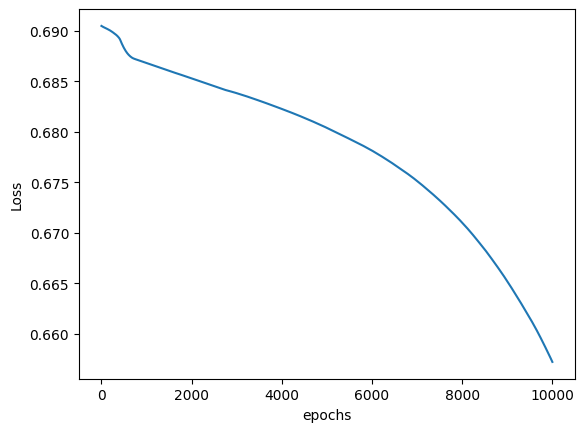

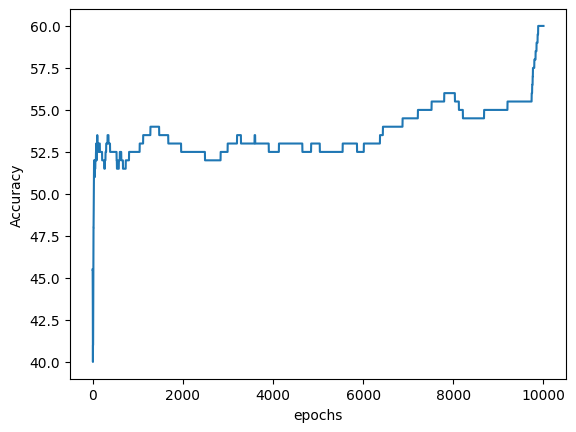

In [102]:
plt.plot([i.to('cpu') for i in loss_pred])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(acc_pred)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

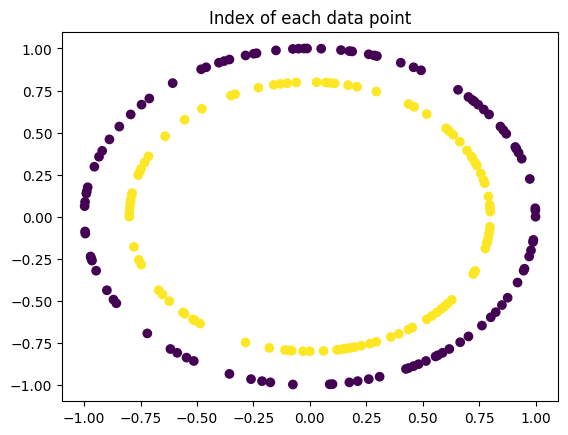

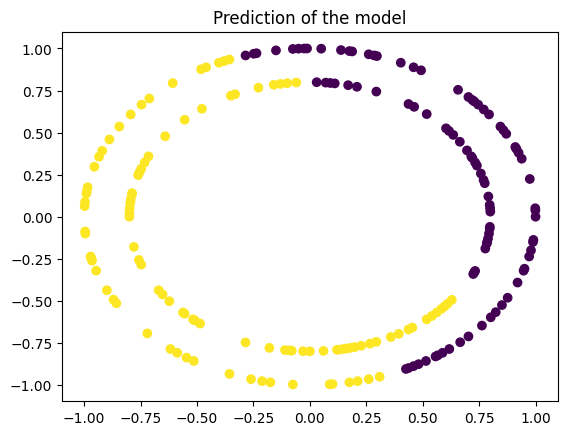

In [103]:
plt.title('Index of each data point')
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=y_test.to('cpu'))
plt.show()
plt.title('Prediction of the model')
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=torch.round(torch.sigmoid(y_pred_logits[-1])).to('cpu').to('cpu'))
plt.show()